# Stock Market API Project

In [1]:
%pip install python-dotenv plotly nbformat


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import os
api_key = os.getenv("API_KEY")

In [4]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

In [5]:
data

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

In [6]:
data.keys()

dict_keys(['bestMatches'])

In [7]:
matches = data["bestMatches"]

In [8]:
import pandas as pd
symbols = pd.DataFrame(matches)
symbols

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBIN.BSE,State Bank of India,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,1.0000
1,SBKFF,State Bank of India,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
2,SID.FRK,State Bank of India,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,1.0000
3,SBID.LON,State Bank of India GDR,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.9048


### State bank of India symbol in India is SBIN.BSE

In [9]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY",
               "symbol":"SBIN.BSE",
               "outputsize":"compact",
               "datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data2 = response.json()

In [10]:
data2

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SBIN.BSE',
  '3. Last Refreshed': '2024-11-13',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-11-13': {'1. open': '822.5000',
   '2. high': '831.6500',
   '3. low': '804.4500',
   '4. close': '808.3500',
   '5. volume': '454522'},
  '2024-11-12': {'1. open': '851.0000',
   '2. high': '853.0000',
   '3. low': '824.1000',
   '4. close': '826.4000',
   '5. volume': '467134'},
  '2024-11-11': {'1. open': '847.0000',
   '2. high': '853.6500',
   '3. low': '841.4500',
   '4. close': '847.8000',
   '5. volume': '1417460'},
  '2024-11-08': {'1. open': '860.0000',
   '2. high': '863.6500',
   '3. low': '834.3000',
   '4. close': '843.2500',
   '5. volume': '1106664'},
  '2024-11-07': {'1. open': '860.0500',
   '2. high': '862.4500',
   '3. low': '846.7000',
   '4. close': '859.2500',
   '5. volume': '494821'},
  '2024-11-06': {'1. open': '850.000

In [11]:
data2.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [12]:
df2 = pd.DataFrame(data2["Time Series (Daily)"]).T
df2

,1. open,2. high,3. low,4. close,5. volume
2024-11-13,822.5000,831.6500,804.4500,808.3500,454522
2024-11-12,851.0000,853.0000,824.1000,826.4000,467134
2024-11-11,847.0000,853.6500,841.4500,847.8000,1417460
2024-11-08,860.0000,863.6500,834.3000,843.2500,1106664
2024-11-07,860.0500,862.4500,846.7000,859.2500,494821
...,...,...,...,...,...
2024-06-27,845.0500,847.4000,838.4000,844.1500,473372
2024-06-26,841.8000,848.6000,836.0000,845.0500,543783
2024-06-25,838.6500,845.7500,834.9500,841.8500,538485
2024-06-24,832.7500,836.0500,820.8500,832.6500,2194566


In [13]:
df2.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [14]:
df2 = df2.astype("float")

In [15]:
df2

,1. open,2. high,3. low,4. close,5. volume
2024-11-13,822.50,831.65,804.45,808.35,454522.0
2024-11-12,851.00,853.00,824.10,826.40,467134.0
2024-11-11,847.00,853.65,841.45,847.80,1417460.0
2024-11-08,860.00,863.65,834.30,843.25,1106664.0
2024-11-07,860.05,862.45,846.70,859.25,494821.0
...,...,...,...,...,...
2024-06-27,845.05,847.40,838.40,844.15,473372.0
2024-06-26,841.80,848.60,836.00,845.05,543783.0
2024-06-25,838.65,845.75,834.95,841.85,538485.0
2024-06-24,832.75,836.05,820.85,832.65,2194566.0


In [16]:
df2.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [17]:
df2.index = pd.to_datetime(df2.index)

### Plot the graph

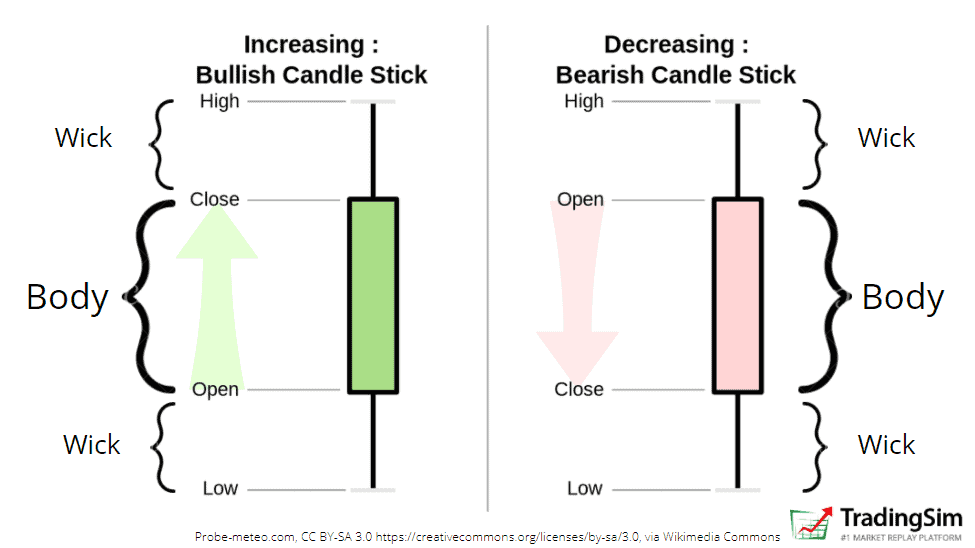
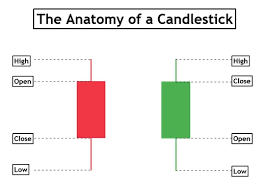

In [18]:
df2.to_csv("SBIN.csv")

### Visualize SBI stock price

In [19]:
import plotly.graph_objects as go

In [20]:
chart = go.Figure(
    data = [
        go.Candlestick(
            x = df2.index,
            open = df2["1. open"],
            high = df2["2. high"],
            low = df2["3. low"],
            close = df2["4. close"]
        )
    ]
)

chart.update_layout(width=1200, height=800)

chart.show()

### Creating a class for Getting any stock data

In [25]:
class StockFetch:

    def __init__(self, api_key) -> None:
        self.api_key = api_key
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": self.api_key,
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def get_stock_symbol(self, company):
        querystring = {
            "datatype": "json",
            "keywords": company,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        response.raise_for_status()
        data = response.json()["bestMatches"]
        symbols = pd.DataFrame(data)
        return symbols

    def stock_prices(self, symbol):
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        response.raise_for_status()
        data = response.json()["Time Series (Daily)"]
        prices = pd.DataFrame(data).T
        prices = prices.astype(float)
        prices.index = pd.to_datetime(prices.index)
        return prices

    def candlestick_chart(self, prices):
        chart = go.Figure(
            data=[
                go.Candlestick(
                    x=prices.index,
                    open=prices["1. open"],
                    high=prices["2. high"],
                    low=prices["3. low"],
                    close=prices["4. close"],
                )
            ]
        )
        chart.update_layout(width=1200, height=800)
        chart.show()

In [26]:
client = StockFetch(api_key= os.getenv("API_KEY"))
client

In [27]:
type(client)

__main__.StockFetch

In [28]:
client.get_stock_symbol("HDFC Bank")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,HDB,HDFC Bank Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.8182
1,HDFCBANK.BSE,HDFC Bank Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.8000
2,H1DB34.SAO,HDFC Bank Limited,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.6923
3,HDFA.FRK,HDFC Bank Limited,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.6923


In [29]:
prices = client.stock_prices(symbol = "HDFCBANK.BSE")
prices

,1. open,2. high,3. low,4. close,5. volume
2024-11-13,1711.30,1729.00,1672.50,1681.25,379694.0
2024-11-12,1767.20,1773.25,1708.80,1718.35,320337.0
2024-11-11,1753.00,1782.50,1751.55,1766.60,1008339.0
2024-11-08,1747.05,1761.45,1746.15,1754.55,167441.0
2024-11-07,1749.95,1760.10,1737.80,1746.15,131631.0
...,...,...,...,...,...
2024-06-28,1697.95,1706.10,1678.80,1683.55,1070000.0
2024-06-27,1698.40,1713.00,1687.00,1696.50,263950.0
2024-06-26,1709.60,1710.70,1691.10,1699.50,372270.0
2024-06-25,1672.10,1717.10,1672.00,1710.90,1520000.0


In [30]:
prices.to_csv("HDFCBank.csv")

In [31]:
client.candlestick_chart(prices= prices)

In [32]:
client.get_stock_symbol(company= "Adani")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,ADANIENT.BSE,Adani Enterprises Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6250
1,ADANIENSOL.BSE,Adani Energy Solutions Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.5556
2,ADANIGREEN.BSE,Adani Green Energy Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.5556
3,ADANIPORTS.BSE,ADANI PORTS AND SPECIAL ECONOMIC ZONE LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.5556
4,ADANIPOWER.BSE,Adani Power Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.5556
5,AWL.BSE,Adani Wilmar Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.4762
6,ATGL.BSE,Adani Total Gas Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.4167
7,541450.BSE,Adani Green Energy Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.3226
8,532921.BSE,Adani Ports and Special Economic Zone Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.2000


In [33]:
prices2 = client.stock_prices(symbol= "ADANIPOWER.BSE")
prices2

,1. open,2. high,3. low,4. close,5. volume
2024-11-13,558.05,598.00,541.50,547.55,633607.0
2024-11-12,583.85,587.00,555.00,557.80,125483.0
2024-11-11,583.90,587.20,578.00,578.85,102354.0
2024-11-08,599.75,599.75,586.85,588.65,77865.0
2024-11-07,618.80,618.80,597.00,599.60,220906.0
...,...,...,...,...,...
2024-06-28,717.95,728.00,715.05,718.20,200771.0
2024-06-27,720.75,728.00,710.15,715.30,365709.0
2024-06-26,725.00,730.00,719.00,720.00,307383.0
2024-06-25,738.05,744.30,724.00,725.55,129773.0


In [34]:
prices2.to_csv("AdaniPower.csv")

In [35]:
client.candlestick_chart(prices= prices2)